<a href="https://www.kaggle.com/code/utkarshtomar736/01-mushroom-classification?scriptVersionId=194272053" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mushroom Classification

## Importing Libraries

In [1]:
from fastai.vision.all import *

## Loading Dataset

In [2]:
path = Path('/kaggle/input/mushrooms-images-classification-215/data/data')

In [3]:
path

Path('/kaggle/input/mushrooms-images-classification-215/data/data')

In [4]:
(path/'elfin_saddle').ls()

(#15) [Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/11.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/4.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/9.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/14.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/1.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/2.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/10.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/12.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/7.png'),Path('/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/5.png')...]

In [5]:
im = Image.open((path/'elfin_saddle').ls()[0])

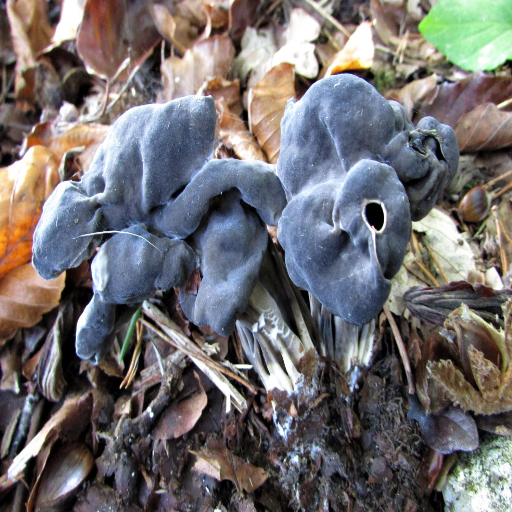

In [6]:
im

In [8]:
dblock = DataBlock(blocks = (ImageBlock(),CategoryBlock()),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct=0.2),
                  get_y = parent_label,
                  item_tfms = Resize(460),
                  batch_tfms = [*aug_transforms(size=224, min_scale=0.75),
                                Normalize.from_stats(mean=[0.3473, 0.3364, 0.2854],
                                                     std=[0.2610, 0.2427, 0.2387])])

In [10]:
dls = dblock.dataloaders(path)

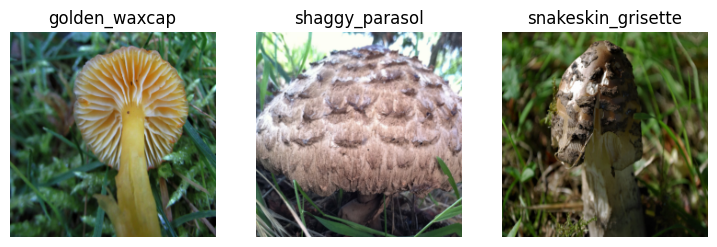

In [11]:
dls.show_batch(nrows=1, ncols=3)

## Training

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 150MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,6.677860,4.606755,0.895833,00:33


epoch,train_loss,valid_loss,error_rate,time
0,4.537615,3.630695,0.754808,00:29
1,3.491521,3.282349,0.700321,00:29


In [24]:
%%capture
learn.to_fp16()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learn.model.to(device)

### Finding appropriate Learning rate to further train the model

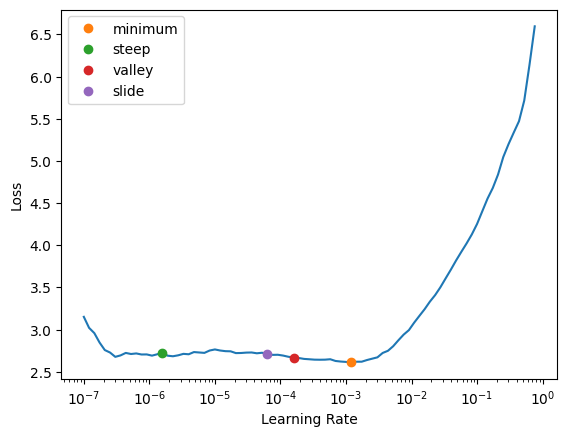

In [32]:
lrs = learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [33]:
lrs

SuggestedLRs(minimum=0.00012022644514217973, steep=1.5848931980144698e-06, valley=0.00015848931798245758, slide=6.30957365501672e-05)

In [34]:
learn.fit_one_cycle(10, lrs.valley)

epoch,train_loss,valid_loss,error_rate,time
0,2.691498,3.171273,0.679487,00:37
1,2.558075,2.936769,0.637821,00:37
2,2.311880,2.729512,0.597756,00:36
3,1.962174,2.499798,0.525641,00:36
4,1.621786,2.292234,0.498397,00:36
5,1.282530,2.158057,0.479167,00:36
6,1.019897,2.089805,0.448718,00:36
7,0.828950,2.012175,0.435897,00:36
8,0.715722,1.994190,0.426282,00:36
9,0.634919,1.991753,0.426282,00:38


>The training loss has gone down to `0.63` from `4.5` by using a suitable learning rate and training it for 10 epochs with that.

## Inference

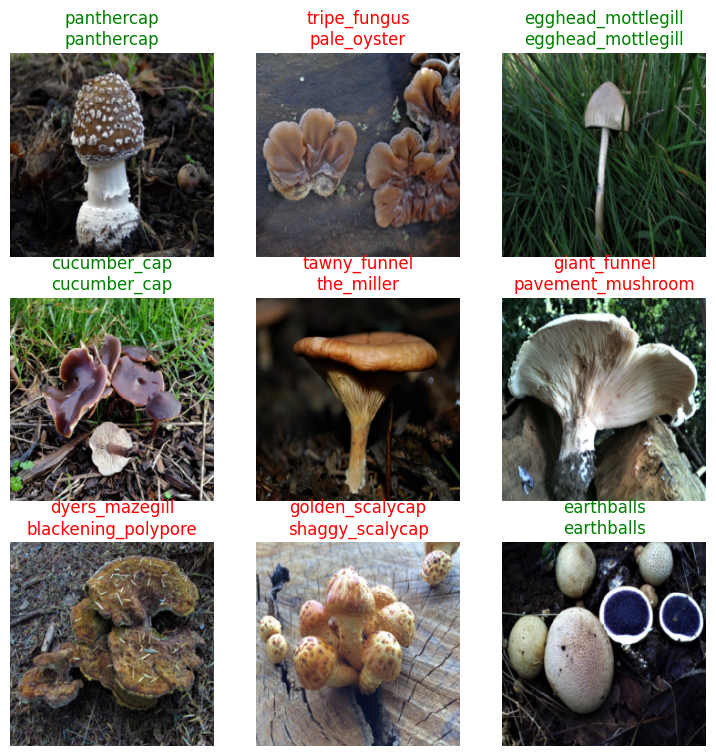

In [35]:
learn.show_results()

## Prediction

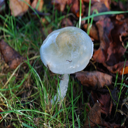

In [36]:
Image.open((path/'blue_roundhead').ls()[0]).to_thumb(128, 128)

In [38]:
# learn.predict()

mushroom_type,_,probs = learn.predict((path/'blue_roundhead').ls()[0])
print(f"Which kind of Mushroom is it?: {mushroom_type}.")
print(f"Confidence level of this Prediction: {probs[0]:.2f}")

Which kind of Mushroom is it?: blue_roundhead.
Confidence level of this Prediction: 0.00


## Aknowledgement

[mushroom classification](https://www.kaggle.com/code/vaibhavnakrani/mushroom-classification) by [vaibhav Nkarani](https://www.kaggle.com/vaibhavnakrani)

[Tomatoes classification using FastAI library](https://www.kaggle.com/code/milindchawre/tomatoes-classification-using-fastai-library) by [Milind Chawre](https://www.kaggle.com/milindchawre)